# 1. データセットを取得

In [1]:
from sklearn import datasets
import numpy as np

# iris データセットをロード
iris = datasets.load_iris()
# 3,4列目の特徴量を抽出
X = iris.data[:, [2, 3]]
# クラスラベルを取得
y = iris.target

print ("Class labels:", np.unique(y))

('Class labels:', array([0, 1, 2]))


# 2. データセットをトレーニング用とテスト用に分割

In [2]:
from sklearn.cross_validation import train_test_split
# 全体の30% をテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 3. 特徴量を標準化する

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
# 計算した結果を元にデータを標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 4. パーセプトロンモデルをトレーニング

In [4]:
from sklearn.linear_model import Perceptron
# トレーニング回数40, 学習率0.1 でインスタンス生成
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0, shuffle=True)
# 学習
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

# 5. 予測（テスト）

In [5]:
# テストデータで予測を実施
y_pred = ppn.predict(X_test_std)
# 誤分類のサンプルの個数を表示
print('Misclassified samples: %d' % (y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
# 正解率を表示
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 4
Accuracy: 0.91


# 6. 決定境界を描画

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, xlabel='x', ylabel='y', title='title', legend_loc='upper left'):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'o', 'v', '^', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    print 'xx1'
    print xx1
    print 'xx2'
    print xx2
    print 'xx1.ravel()'
    print xx1.ravel()
    print 'xx2.ravel()'
    print xx2.ravel()
    
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    print 'Z'
    print Z
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, aplha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
    # テストサンプルを目立たせる
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidths=1, marker='o',
                   s=55, label='test set')
        
    # 軸のラベルの設定
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # タイトル設定
    plt.title(title)
    # 凡例の設定
    plt.legend(loc=legend_loc)
    # 図の表示
    plt.show()

xx1
[[-2.57496421 -2.55496421 -2.53496421 ...,  2.66503579  2.68503579
   2.70503579]
 [-2.57496421 -2.55496421 -2.53496421 ...,  2.66503579  2.68503579
   2.70503579]
 [-2.57496421 -2.55496421 -2.53496421 ...,  2.66503579  2.68503579
   2.70503579]
 ..., 
 [-2.57496421 -2.55496421 -2.53496421 ...,  2.66503579  2.68503579
   2.70503579]
 [-2.57496421 -2.55496421 -2.53496421 ...,  2.66503579  2.68503579
   2.70503579]
 [-2.57496421 -2.55496421 -2.53496421 ...,  2.66503579  2.68503579
   2.70503579]]
xx2
[[-2.4487218 -2.4487218 -2.4487218 ..., -2.4487218 -2.4487218 -2.4487218]
 [-2.4287218 -2.4287218 -2.4287218 ..., -2.4287218 -2.4287218 -2.4287218]
 [-2.4087218 -2.4087218 -2.4087218 ..., -2.4087218 -2.4087218 -2.4087218]
 ..., 
 [ 2.5912782  2.5912782  2.5912782 ...,  2.5912782  2.5912782  2.5912782]
 [ 2.6112782  2.6112782  2.6112782 ...,  2.6112782  2.6112782  2.6112782]
 [ 2.6312782  2.6312782  2.6312782 ...,  2.6312782  2.6312782  2.6312782]]
xx1.ravel()
[-2.57496421 -2.55496421 -2.

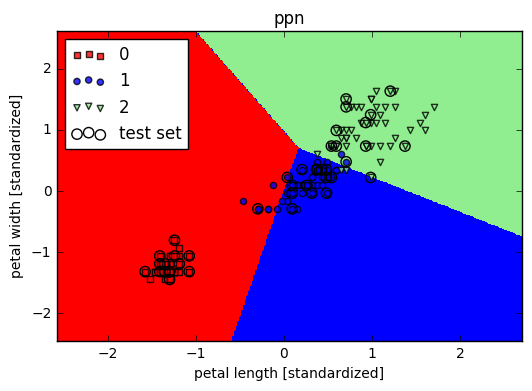

In [7]:
# トレーニングデータとテストデータを行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
# 同様にクラスラベルも結合
y_combined = np.hstack((y_train, y_test))
# 決定領域をプロット
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,
                      test_idx=range(105, 150), xlabel='petal length [standardized]', ylabel='petal width [standardized]',
                      title='ppn')